In [116]:
!pip install opencv-python mediapipe--quiet

ERROR: Could not find a version that satisfies the requirement mediapipe--quiet (from versions: none)
ERROR: No matching distribution found for mediapipe--quiet


In [117]:
import math
import cv2
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt
import os
from IPython.display import HTML

In [118]:
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode = True, min_detection_confidence=0.3, model_complexity=2)

mp_drawing = mp.solutions.drawing_utils

In [119]:
def detectPose(image, pose, landmark_display=False, display=False):
  output_img = image.copy()
  imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  results = pose.process(imageRGB)
  height, width, _ = image.shape

  pose_landmarks = results.pose_landmarks
  landmarks = []
  if results.pose_landmarks:

      if landmark_display:
        mp_drawing.draw_landmarks(image=output_img,
                                  landmark_list = pose_landmarks,
                                  connections = mp_pose.POSE_CONNECTIONS)

      for landmark in pose_landmarks.landmark:
        landmarks.append((int(landmark.x * width), int(landmark.y * height), (landmark.z * width)))

      if display:
        # Original Image
        plt.figure(figsize=[22,22])
        plt.subplot(121)
        plt.imshow(image[:,:,::-1])
        plt.title("Original Image")
        plt.axis('off')

        # Output Image
        plt.subplot(122)
        plt.imshow(output_img[:,:,::-1])
        plt.title("Output Image")
        plt.axis('off')

      else:
        return output_img, landmarks


# Demo of the landmarks in the image

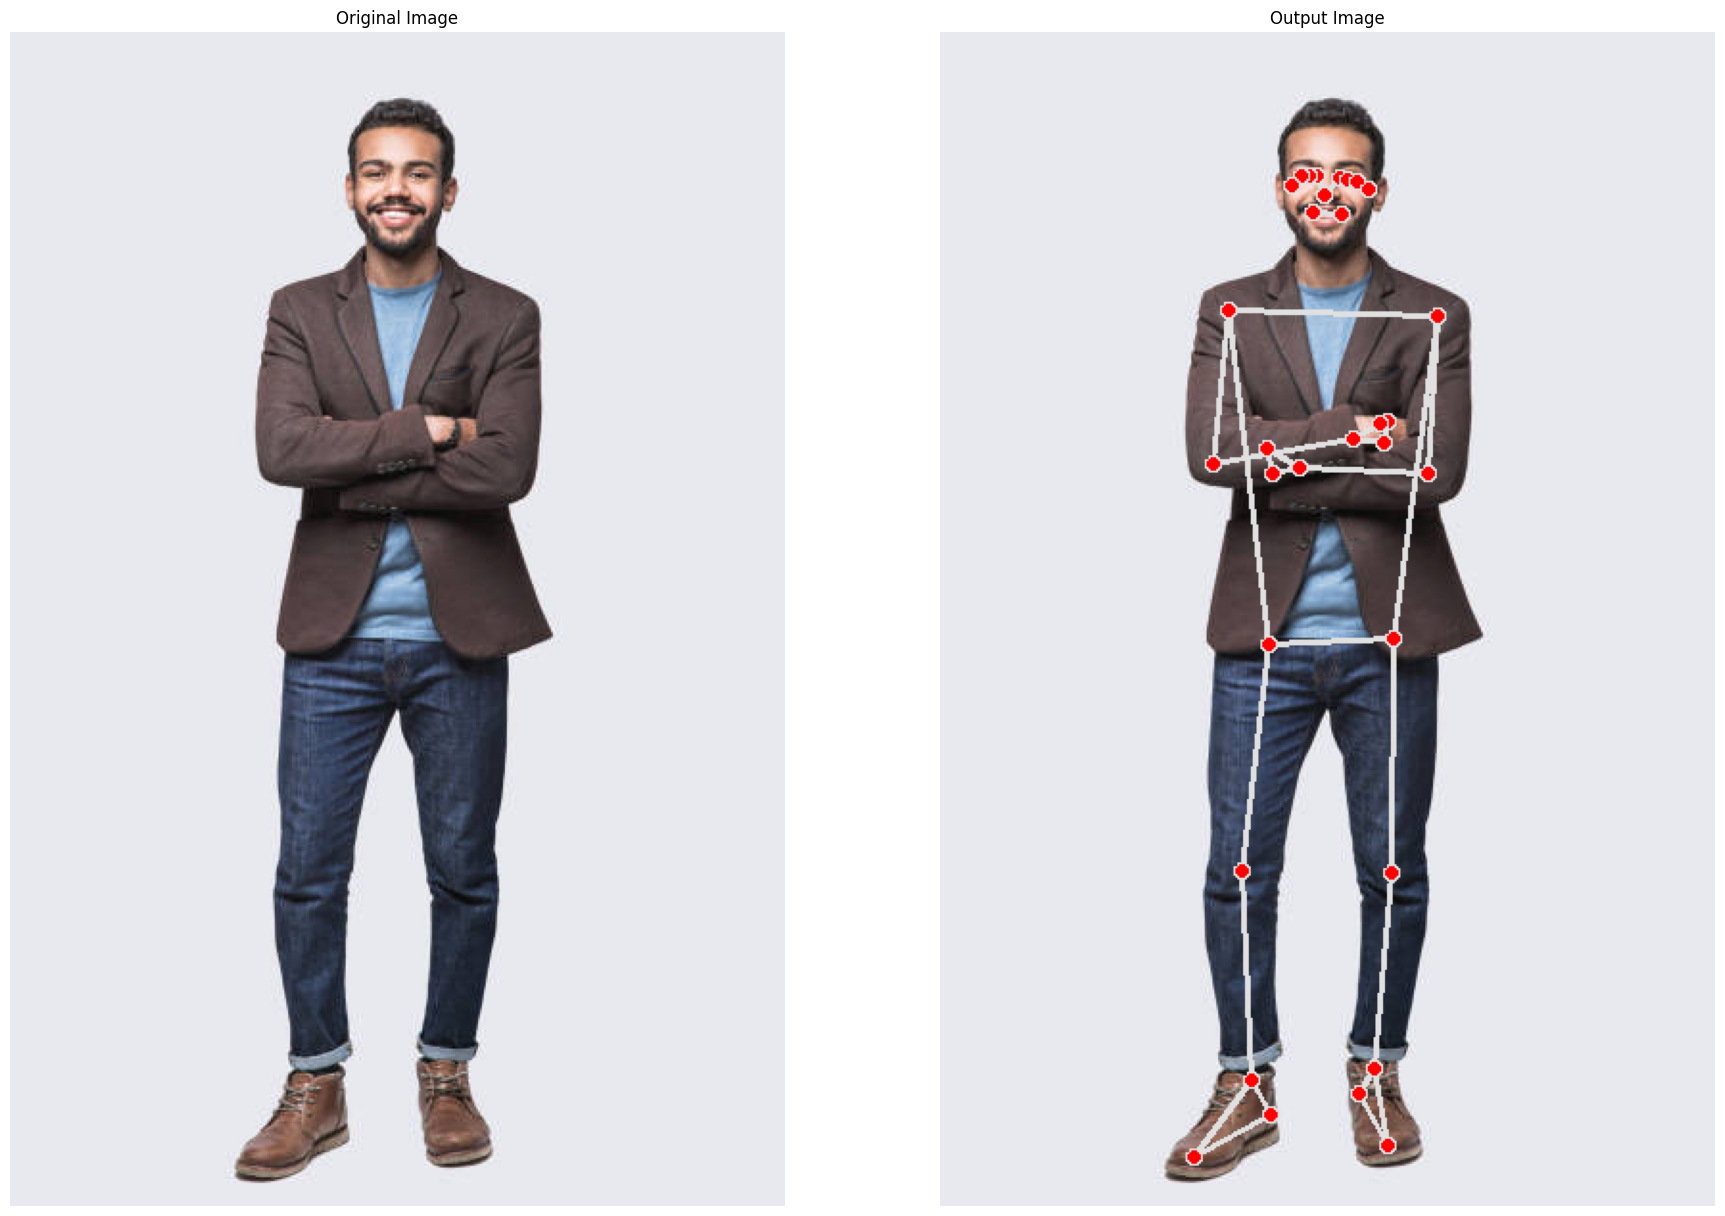

In [120]:
image = cv2.imread('Inputs\standing.jpg')
detectPose(image, pose, landmark_display=True, display=True)

In [121]:
def calculateAngle(lm1, lm2, lm3):
  '''
  This function calculates angle between three different landmarks.
  '''
  x1, y1, _ = lm1
  x2, y2, _ = lm2
  x3, y3, _ = lm3

  # Calculate the angle between the three points
  angle = math.degrees(math.atan2(y3 - y2, x3 - x2) - math.atan2(y1 - y2, x1 - x2))

  if angle < 0:
      angle += 360
  if angle>180:
    angle = 360-angle

  return angle

In [122]:
def classifyPose(landmarks, output_img, display=False):
  '''
    This function classifies yoga poses depending upon the angles of various body joints.
  '''
  label = 'UNKNOWN'
  color = (0,0,255)

  left_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_HIP.value],
                                   landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value],
                                   landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value])

  right_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                    landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value],
                                    landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value])

  left_hip_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                  landmarks[mp_pose.PoseLandmark.LEFT_HIP.value],
                                  landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value])

  right_hip_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                  landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                  landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value])

  if left_knee_angle>160 and left_knee_angle<195 and right_knee_angle>160 and right_knee_angle<195:
    label = 'Standing'

  if (left_knee_angle<150 and left_knee_angle>20 and right_knee_angle<150 and right_knee_angle>20) or (left_hip_angle<120 and left_hip_angle>40 and right_hip_angle<120 and right_hip_angle>40):
    label = 'Sitting'

  cv2.putText(output_img, label, (10,30), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 5)

  if display:
    plt.figure(figsize=[10,10])
    plt.imshow(output_img[:,:,::-1])
    plt.title("Output Image")
    plt.axis('off');

  else:
    return output_img, label

# Enter Image Path

Enter Image Path: standing.jpg


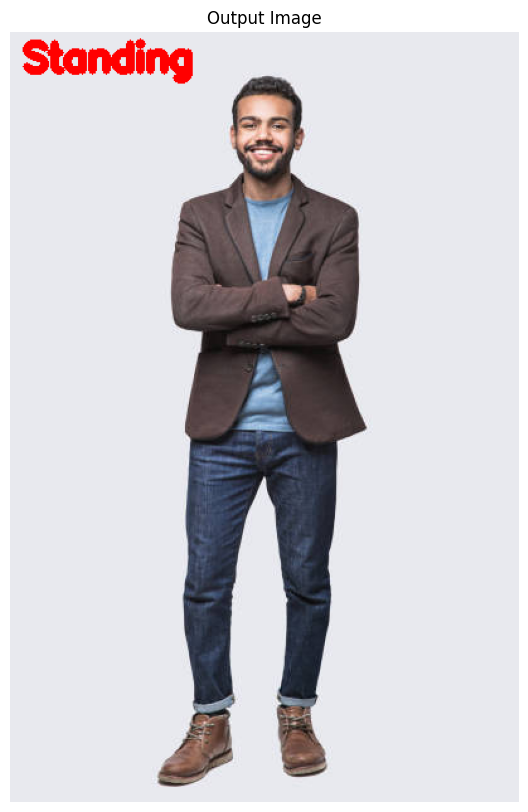

In [131]:
image_path = input('Enter Image Path: ')
image = cv2.imread(image_path)
output_image, landmarks = detectPose(image, pose, landmark_display=False)

if landmarks:
  output_image, label = classifyPose(landmarks,output_image, display=False)
  os.makedirs('Outputs', exist_ok=True)
  cv2.imwrite(os.path.join('Outputs', 'proc_'+image_path), output_image)

  plt.figure(figsize=[10,10])
  plt.imshow(output_image[:,:,::-1])
  plt.title("Output Image")
  plt.axis('off')


# To See Landmark

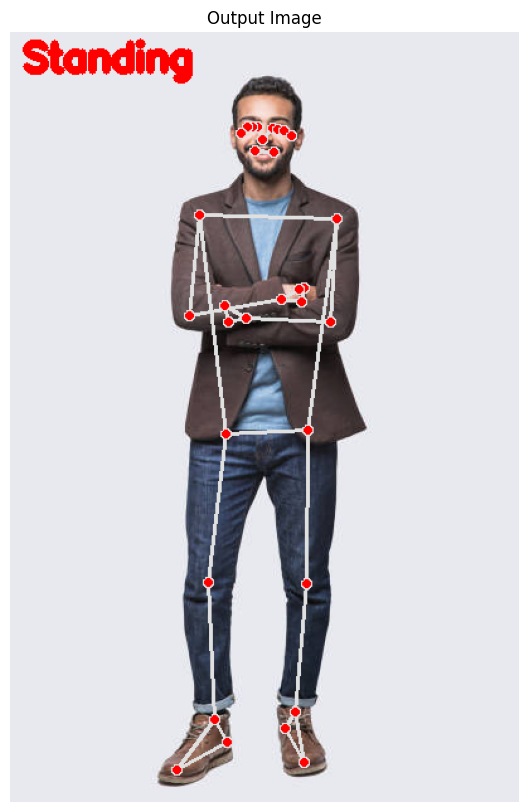

In [132]:
output_image, landmarks = detectPose(image, pose, landmark_display=True)
if landmarks:
  classifyPose(landmarks, output_image, display=True)